In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
parkinsons_data = pd.read_csv('../datasets/parkinsson_disease.csv')

In [3]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
parkinsons_data.shape

(195, 24)

In [5]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [8]:
X = parkinsons_data.drop(["status","name"], axis=1)
y = parkinsons_data["status"]
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
xTest

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
138,112.239,126.609,104.095,0.00472,0.000040,0.00238,0.00290,0.00715,0.05643,0.517,...,0.04451,0.09211,0.02629,17.366,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191
16,144.188,349.259,82.764,0.00544,0.000040,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02074,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
155,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
96,159.116,168.913,144.811,0.00342,0.000020,0.00178,0.00184,0.00535,0.03381,0.307,...,0.02809,0.05417,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
68,143.533,162.215,65.809,0.01101,0.000080,0.00647,0.00467,0.01941,0.05384,0.478,...,0.03392,0.09455,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580
153,121.345,139.644,98.250,0.00684,0.000060,0.00388,0.00332,0.01164,0.02534,0.241,...,0.02056,0.04019,0.04179,21.520,0.566867,0.670475,-4.865194,0.246404,2.013530,0.168581
55,109.860,126.358,104.437,0.00874,0.000080,0.00398,0.00539,0.01193,0.03209,0.307,...,0.02454,0.05368,0.01180,20.767,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834
15,142.167,217.455,83.159,0.00369,0.000030,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
112,204.664,221.300,189.621,0.00841,0.000040,0.00502,0.00485,0.01506,0.02378,0.210,...,0.01767,0.03831,0.01316,21.305,0.498877,0.722085,-4.876336,0.212054,2.376749,0.268144
111,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [12]:
yTest

138    1
16     1
155    1
96     1
68     1
153    1
55     1
15     1
112    1
111    1
184    0
18     1
82     1
9      1
164    1
117    1
69     1
113    1
192    0
119    1
123    1
144    1
66     1
45     0
158    1
115    1
67     1
93     1
30     0
101    1
118    1
75     1
24     1
172    0
127    1
169    0
19     1
168    0
73     1
Name: status, dtype: int64

In [13]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
xgb_model = XGBClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(rf_model, X, y, cv=kfold)
print(f"Random Forest CV Scores: {rf_scores}")
print(f"Random Forest CV Mean Score: {rf_scores.mean()}")
print("--"*40)

svm_scores = cross_val_score(svm_model, X, y, cv=kfold)
print(f"SVM CV Scores: {svm_scores}")
print(f"SVM CV Mean Score: {svm_scores.mean()}")
print("--"*40)

xgb_scores = cross_val_score(xgb_model, X, y, cv=kfold)
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"XGBoost CV Mean Score: {xgb_scores.mean()}")
print("--"*40)

Random Forest CV Scores: [0.94871795 0.94871795 0.94871795 0.8974359  0.84615385]
Random Forest CV Mean Score: 0.9179487179487179
--------------------------------------------------------------------------------
SVM CV Scores: [0.84615385 0.74358974 0.8974359  0.79487179 0.79487179]
SVM CV Mean Score: 0.8153846153846154
--------------------------------------------------------------------------------
XGBoost CV Scores: [0.94871795 0.94871795 0.92307692 0.87179487 0.87179487]
XGBoost CV Mean Score: 0.9128205128205128
--------------------------------------------------------------------------------


Applying the Support Vector Machine Model

Accuracy on train data by SVM Classifier: 80.76923076923077


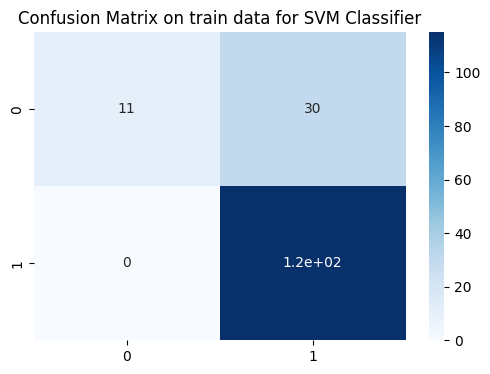

Accuracy on test data by SVM Classifier: 84.61538461538461


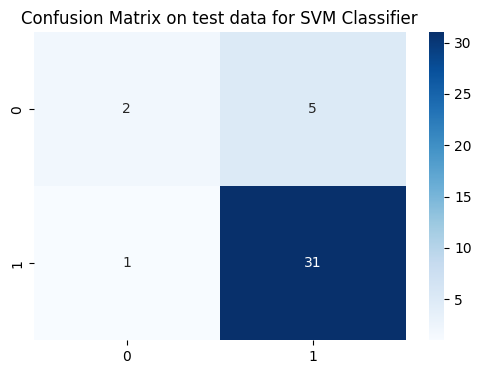

In [14]:
svm_model.fit(xTrain, yTrain)
preds_test = svm_model.predict(xTest)
preds_train = svm_model.predict(xTrain)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(yTrain, svm_model.predict(xTrain))*100}")
cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for SVM Classifier")
plt.show()

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(yTest, preds_test)*100}")
cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for SVM Classifier")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0


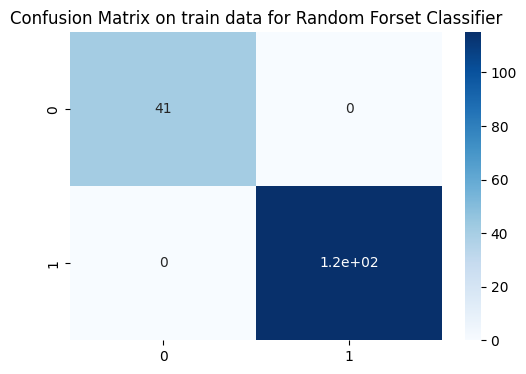

Accuracy on test data by Random Forest Classifier: 94.87179487179486


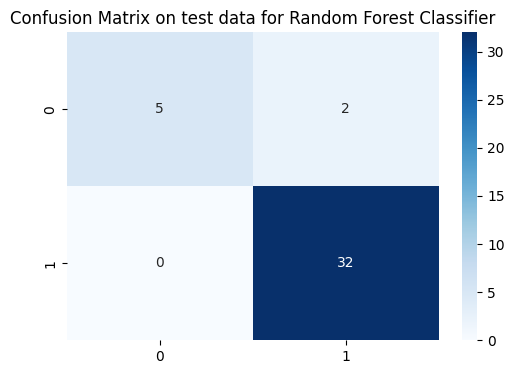

In [15]:
rf_model.fit(xTrain, yTrain)
preds_test = rf_model.predict(xTest)
preds_train = rf_model.predict(xTrain)

print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(yTrain, rf_model.predict(xTrain))*100}")

cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for Random Forset Classifier")
plt.show()

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(yTest, preds_test)*100}")

cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for Random Forest Classifier")
plt.show()

Accuracy on the train data XGBoost Classifier : 100.0


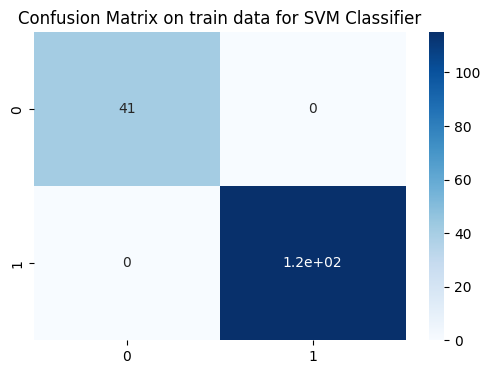

Accuracy on the test data by XGBoost Classifier: 94.87179487179486


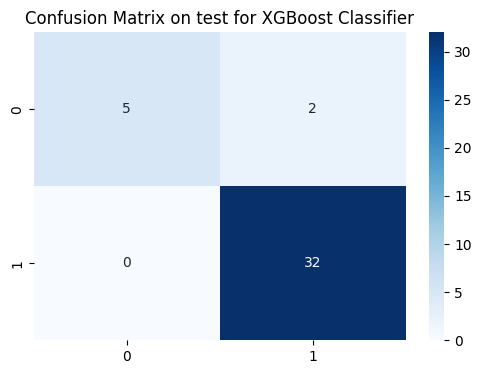

In [16]:
xgb_model.fit(xTrain, yTrain)
predict_test = xgb_model.predict(xTest)
predict_train = xgb_model.predict(xTrain)

print(f"Accuracy on the train data XGBoost Classifier : {accuracy_score(yTrain, xgb_model.predict(xTrain)) * 100}")
cf_matrix_train = confusion_matrix(yTrain, predict_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for SVM Classifier")
plt.show()

print(f"Accuracy on the test data by XGBoost Classifier: {accuracy_score(yTest, predict_test) * 100}")

cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test for XGBoost Classifier")
plt.show()

Applying the combined model

In [17]:
input_data = (199.22800,209.51200,192.09100,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.08900,0.00504,0.00641,0.00762,0.01513,0.00167,30.94000,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501)

input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1, -1)

In [18]:
input_data

array([ 1.992280e+02,  2.095120e+02,  1.920910e+02,  2.410000e-03,
        1.000000e-05,  1.340000e-03,  1.380000e-03,  4.020000e-03,
        1.015000e-02,  8.900000e-02,  5.040000e-03,  6.410000e-03,
        7.620000e-03,  1.513000e-02,  1.670000e-03,  3.094000e+01,
        4.324390e-01,  7.420550e-01, -7.682587e+00,  1.733190e-01,
        2.103106e+00,  6.850100e-02])

In [19]:
input_data_reshaped

array([[ 1.992280e+02,  2.095120e+02,  1.920910e+02,  2.410000e-03,
         1.000000e-05,  1.340000e-03,  1.380000e-03,  4.020000e-03,
         1.015000e-02,  8.900000e-02,  5.040000e-03,  6.410000e-03,
         7.620000e-03,  1.513000e-02,  1.670000e-03,  3.094000e+01,
         4.324390e-01,  7.420550e-01, -7.682587e+00,  1.733190e-01,
         2.103106e+00,  6.850100e-02]])

In [20]:
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

result = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')

result.fit(xTrain, yTrain)
prediction = result.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person is diseased with Parkinson's disease")
else:
    print("The person is not diseased with Parkinson's disease")

The person is diseased with Parkinson's disease


C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = '../models/trained_model.sav'
pickle.dump(result, open(filename, 'wb'))

Loading the saved model

In [ ]:
loaded_model = pickle.load(open('../models/trained_model.sav', 'rb'))

In [ ]:
input_data = (199.22800,209.51200,192.09100,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.08900,0.00504,0.00641,0.00762,0.01513,0.00167,30.94000,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501)

input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1, -1)

result = loaded_model.predict(input_data_reshaped)

if result[0] == 0:
    print("The person dose not have Parkinson's Disease")
else:
    print("The person has Parkinson's Disease")